In [2]:
pip install pandas openpyxl

  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/c1/8b/5fe2cc11fee489817272089c4203e679c63b570a5aaeb18d852ae3cbba6a/et_xmlfile-2.0.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 6.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Read a single sheet by name
df = pd.read_excel('GuttmacherInstituteAbortionDataByState.xlsx')

df.head()

,U.S. State,"% change in abortion rate, 2017-2020","% change in the no. of abortion clinics, 2017-2020","% change in the no. of abortion providers, 2014-2017","% of all U.S. abortions, by state of occurrence, 2020","% of counties without a known abortion provider, 2014","% of counties without a known clinic, 2020","% of residents obtaining abortions who traveled out of state for care, 2020","% of women aged 15-44 living in a county without a clinic, 2020","% of women aged 15-44 living in a county without an abortion provider, 2014",...,"No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020","No. of abortions per 1,000 women aged 15–44, by state of residence, 2020","No. of abortions, by state of occurrence, 2020","No. of abortions, by state of residence, 2020","No. of federally funded abortions, 2010","No. of state funded abortions, 2010","Reported public expenditures for abortions (in 000s of dollars), federal, 2015","Reported public expenditures for abortions (in 000s of dollars), state, 2015","Total no. of publicly funded abortions , 2010","Total reported public expenditures for abortions (in 000s of dollars), 2015"
0,Alabama,-6,0,-22,0.6,91,93,47,59,58,...,6.0,9.5,5700,9060,9,0,22,0,9,22
1,Alaska,0,0,-25,0.1,79,87,7,33,17,...,8.6,9.2,1240,1320,0,835,0,216,835,216
2,Arizona,1,0,-8,1.4,80,80,6,18,19,...,9.3,9.7,13320,13820,1,13,28,11,14,40
3,Arkansas,2,-33,0,0.3,97,99,37,86,77,...,5.6,7.8,3250,4510,0,0,0,0,0,0
4,California,17,7,-18,16.6,24,38,0,3,1,...,19.2,19.0,154060,152400,0,88466,0,32613,88466,32613


In [3]:
df.shape[1]


31

In [4]:
df.columns.unique

<bound method Index.unique of Index(['U.S. State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 20

In [5]:
sorted(df['Change in the no. of abortion clinics, 2017-2020'])

[-9,
 -7,
 -6,
 -4,
 -3,
 -2,
 -2,
 -2,
 -2,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 5,
 5,
 12]

In [6]:
state_col = 'U.S. State'
rate_col = 'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017'

# 按青少年堕胎率降序排序，取前 10
top10 = (
    df
    .loc[:, [state_col, rate_col]]
    .sort_values(by=rate_col, ascending=False)
    .head(10)
)

print(top10)

              U.S. State  \
8   District of Columbia   
32              New York   
30            New Jersey   
20              Maryland   
4             California   
6            Connecticut   
9                Florida   
28                Nevada   
13              Illinois   
7               Delaware   

    Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017  
8                                                19.8                                             
32                                               16.2                                             
30                                               14.9                                             
20                                               12.7                                             
4                                                 9.6                                             
6                                                 9.3                                            

States with a higher percentage of counties without a known abortion clinic in 2020 had higher abortion rates among women aged 15–19 in 2017.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

state_col       = 'U.S. State'
clinic_drop_col = '% change in the no. of abortion clinics, 2017-2020'
rate_change_col = '% change in abortion rate, 2017-2020'

In [28]:
# find the integer index of the min‐value row
top_idx = df[clinic_drop_col].idxmin()

# pull out that row
top_state_row = df.loc[top_idx]

top_state_row


U.S. State                                                                                      Missouri
% change in abortion rate, 2017-2020                                                                 -98
% change in the no. of abortion clinics, 2017-2020                                                   -67
% change in the no. of abortion providers, 2014-2017                                                 100
% of all U.S. abortions, by state of occurrence, 2020                                                0.0
% of counties without a known abortion provider, 2014                                                 99
% of counties without a known clinic, 2020                                                            99
% of residents obtaining abortions who traveled out of state for care, 2020                           99
% of women aged 15-44 living in a county without a clinic, 2020                                       94
% of women aged 15-44 living in a county without an abo

In [9]:
neighbors = [
    'Iowa',
    'Illinois',
    'Kentucky',
    'Tennessee',
    'Arkansas',
    'Oklahoma',
    'Kansas',
    'Nebraska'
]


In [10]:
nbr_df    = df[df[state_col].isin(neighbors)]
nbr_rates = nbr_df[rate_change_col]


In [11]:
nbr_rates = nbr_df[rate_change_col]
overall_rates = df[rate_change_col]


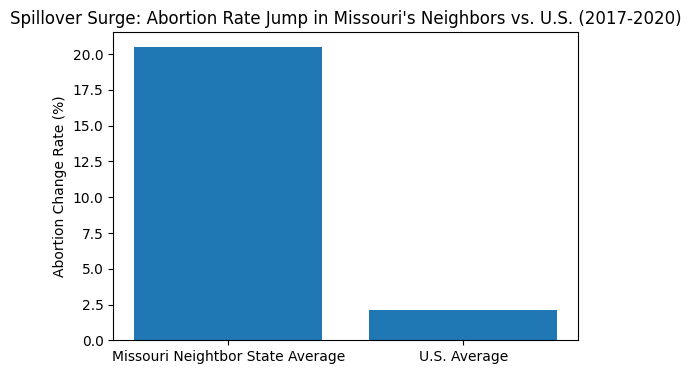

In [49]:
plt.figure(figsize=(6, 4), dpi=100)
means = [nbr_rates.mean(), overall_rates.mean()]
plt.bar(['Missouri Neightbor State Average', 'U.S. Average'], means)
plt.ylabel('Abortion Change Rate (%)')
plt.title("Spillover Surge: Abortion Rate Jump in Missouri's Neighbors vs. U.S. (2017-2020)")
plt.savefig('image1.png', bbox_inches='tight')
plt.show()

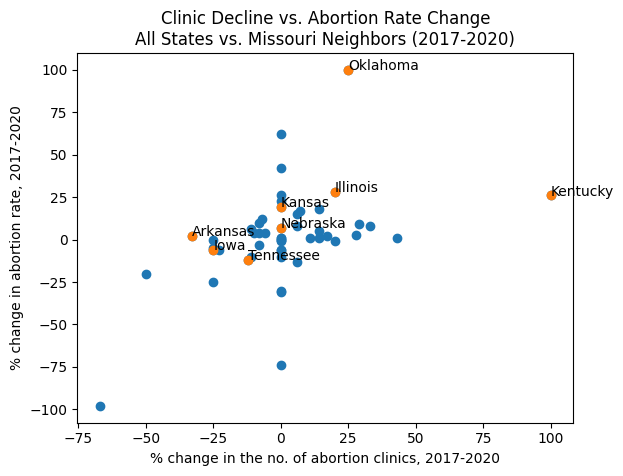

In [12]:
plt.figure()
plt.scatter(df[clinic_drop_col], df[rate_change_col])
plt.scatter(nbr_df[clinic_drop_col], nbr_df[rate_change_col])
for _, row in nbr_df.iterrows():
    plt.annotate(row[state_col], (row[clinic_drop_col], row[rate_change_col]))
plt.xlabel(clinic_drop_col)
plt.ylabel(rate_change_col)
plt.title("Clinic Decline vs. Abortion Rate Change\nAll States vs. Missouri Neighbors (2017-2020)")
plt.show()


/var/folders/qx/5wln5gn17kz1ym6ncw62mn4m0000gn/T/ipykernel_56837/1954594331.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([overall_rates, nbr_rates], labels=['U.S.', 'Neighbor'])


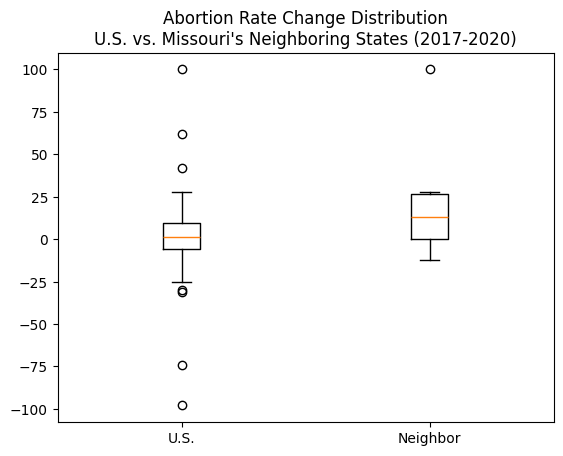

In [13]:
plt.figure()
plt.boxplot([overall_rates, nbr_rates], labels=['U.S.', 'Neighbor'])
plt.title("Abortion Rate Change Distribution\nU.S. vs. Missouri's Neighboring States (2017-2020)")
plt.show()

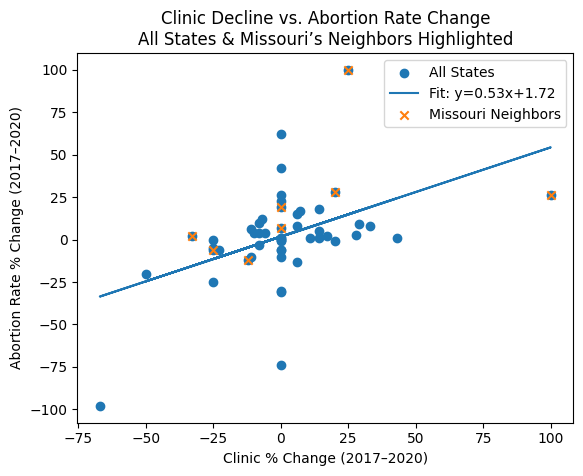

In [14]:
m, b = np.polyfit(df[clinic_drop_col], df[rate_change_col], 1)
plt.figure()
plt.scatter(df[clinic_drop_col], df[rate_change_col], label='All States')
plt.plot(df[clinic_drop_col], m * df[clinic_drop_col] + b, label=f'Fit: y={m:.2f}x+{b:.2f}')
plt.scatter(nbr_df[clinic_drop_col], nbr_df[rate_change_col], marker='x', color='C1', label='Missouri Neighbors')
plt.xlabel('Clinic % Change (2017–2020)')
plt.ylabel('Abortion Rate % Change (2017–2020)')
plt.title("Clinic Decline vs. Abortion Rate Change\nAll States & Missouri’s Neighbors Highlighted")
plt.legend()
plt.show()

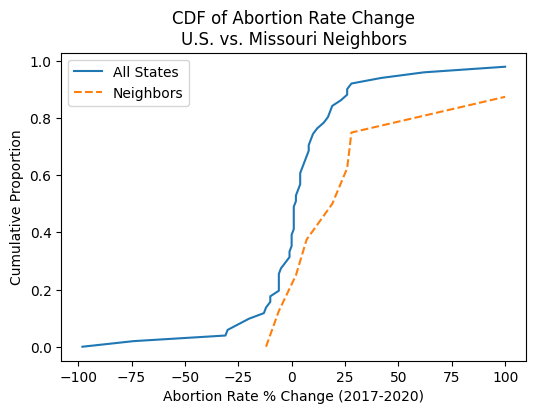

In [15]:
import numpy as np
import matplotlib.pyplot as plt

all_vals = np.sort(df[rate_change_col])
nbr_vals = np.sort(df[df['U.S. State'].isin(neighbors)][rate_change_col])

plt.figure(figsize=(6,4))
plt.plot(all_vals, np.arange(len(all_vals))/len(all_vals), label='All States')
plt.plot(nbr_vals, np.arange(len(nbr_vals))/len(nbr_vals), 
         linestyle='--', label='Neighbors')
plt.xlabel('Abortion Rate % Change (2017-2020)')
plt.ylabel('Cumulative Proportion')
plt.title('CDF of Abortion Rate Change\nU.S. vs. Missouri Neighbors')
plt.legend()
plt.show()


<Figure size 100x200 with 0 Axes>

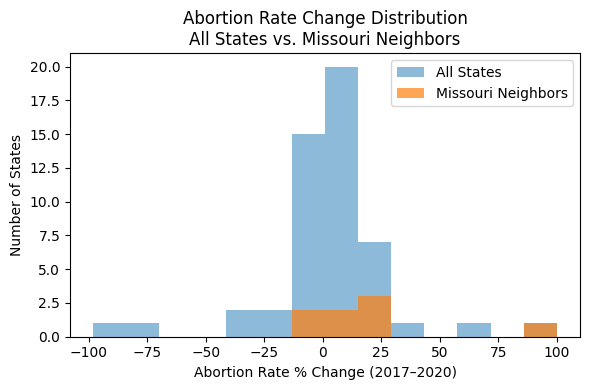

In [38]:

plt.figure(figsize=(1, 2), dpi=100)

# Extract values
us_vals = df[rate_change_col].dropna().values
nbr_vals = df[df['U.S. State'].isin(neighbors)][rate_change_col].dropna().values

# 1) Overlapping Histogram
bins = np.linspace(
    min(us_vals.min(), nbr_vals.min()),
    max(us_vals.max(), nbr_vals.max()),
    15
)
plt.figure(figsize=(6,4))
plt.hist(us_vals, bins=bins, alpha=0.5, label='All States')
plt.hist(nbr_vals, bins=bins, alpha=0.7, label='Missouri Neighbors')
plt.xlabel('Abortion Rate % Change (2017–2020)')
plt.ylabel('Number of States')
plt.title('Abortion Rate Change Distribution\nAll States vs. Missouri Neighbors')
plt.legend()
plt.tight_layout()
plt.savefig('image2.png', bbox_inches='tight')

plt.show()


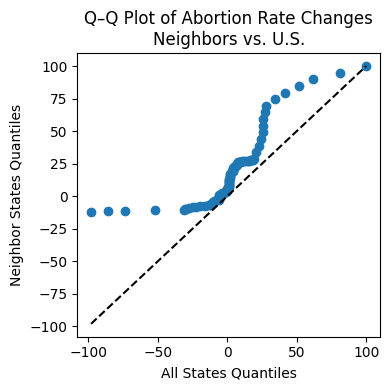

In [20]:
quantiles = np.linspace(0, 1, 100)
us_quants  = np.quantile(us_vals,  quantiles)
nbr_quants = np.quantile(nbr_vals, quantiles)

plt.figure(figsize=(4,4))
plt.scatter(us_quants, nbr_quants)
minv, maxv = min(us_vals.min(), nbr_vals.min()), max(us_vals.max(), nbr_vals.max())
plt.plot([minv, maxv], [minv, maxv], 'k--')
plt.xlabel('All States Quantiles')
plt.ylabel('Neighbor States Quantiles')
plt.title('Q–Q Plot of Abortion Rate Changes\nNeighbors vs. U.S.')
plt.tight_layout()
plt.show()